In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [6]:
df['Дата'] = pd.to_datetime(df['Дата'])

Сгруппируйте данные по дате, посчитайте количество продаж

In [7]:
grouped_df = (
    df
    .groupby('Дата', as_index=False)
    .agg({'Количество': 'sum'})
)

Вывести несколько первых строк сгруппированных данных

In [8]:
grouped_df.head()

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

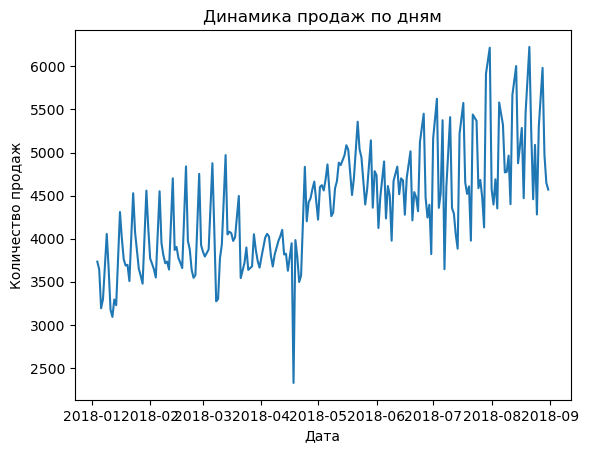

In [9]:
plt.figure()
plt.plot(grouped_df['Дата'], grouped_df['Количество'])
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.title('Динамика продаж по дням')
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

На графике изображена временная динамика суммарного количества продаж по дням.
По оси X отложены даты, по оси Y — общее количество проданных единиц товара за день.

Наблюдаются колебания объёма продаж во времени, что может быть связано с:

-сезонностью,
-днями недели,
-внешними факторами.
Явных трендов на коротком промежутке может не наблюдаться, однако присутствуют отдельные пики, указывающие на аномально высокие продажи в конкретные дни.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [10]:
max_row = df.loc[df['Количество'].idxmax()]
max_row

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object

Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [11]:
filtered_df = df[
    (df['Склад'] == 3) &
    (df['Дата'].dt.month.isin([6, 7, 8])) &
    (df['Дата'].dt.weekday == 2)
]

In [12]:
top_product = (
    filtered_df
    .groupby('Номенклатура', as_index=False)
    .agg({'Количество': 'sum'})
    .sort_values('Количество', ascending=False)
    .head(1)
)

top_product

,Номенклатура,Количество
1,product_1,2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [39]:
weather = pd.read_excel("weather.xlsx")


In [40]:
weather.head()
weather.columns


Index(['Дата', 'T'], dtype='object')

In [42]:
weather['Дата'] = pd.to_datetime(
    weather['Дата']
)


In [43]:
daily_temp = (
    weather
    .groupby(weather['Дата'].dt.date)['T']
    .mean()
    .reset_index()
)

daily_temp.columns = ['Дата', 'T']
daily_temp['Дата'] = pd.to_datetime(daily_temp['Дата'])

daily_temp.head()


,Дата,T
0,2018-01-04,-13.0875
1,2018-01-05,-17.2500
2,2018-01-06,-14.1250
3,2018-01-07,-12.3375
4,2018-01-08,-15.4375


In [44]:
df = grouped_df.merge(
    daily_temp,
    on='Дата',
    how='left'
)


In [45]:
df.head()


,Дата,Количество,T
0,2018-01-04,3734,-13.0875
1,2018-01-05,3643,-17.2500
2,2018-01-06,3193,-14.1250
3,2018-01-07,3298,-12.3375
4,2018-01-09,4055,-7.3875


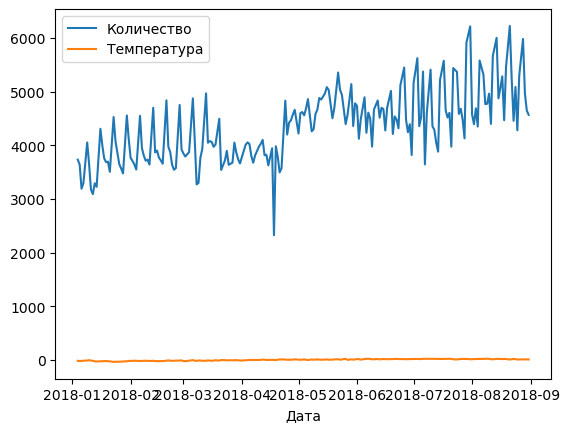

In [47]:
plt.figure()
plt.plot(df['Дата'], df['Количество'], label='Количество')
plt.plot(df['Дата'], df['T'], label='Температура')

plt.xlabel('Дата')
plt.legend()
plt.show()


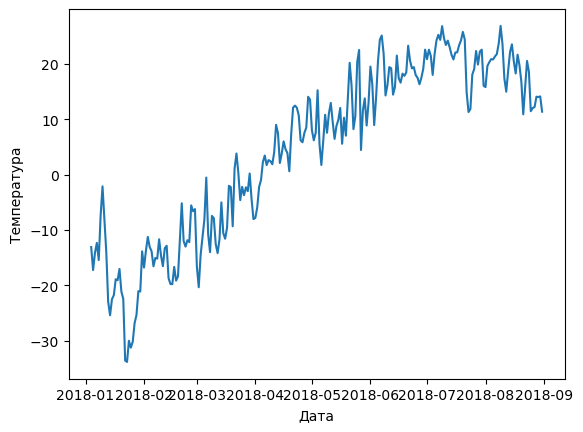

In [48]:
plt.figure()
plt.plot(daily_temp['Дата'], daily_temp['T'])
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.show()
